![logo](../.././docs/images/Logo_Destination_Earth_Colours.png)

## Polytope Extremes-DT example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots with a specific domain.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [ ]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

In [1]:
import earthkit.data
import earthkit.plots
import earthkit.regrid
from polytope.api import Client

In [ ]:
# Set True if you want to make a live request for the data, or false if you want to use the cached grib file
LIVE_REQUEST = True

In [ ]:
# This request matches a single parameter of the extremes DT, at 4km resolution
# which began production on 2023-12-11

request = {
        "class": "d1",
        "expver": "0001",
        "stream": "oper",
        "dataset": "extremes-dt",
        "date": "-14",
        "time": "0000",
        "type": "fc",
        "levtype": "sfc",
        "step": "0",
        "param": "167"
    }

In [ ]:
data_file = "data/extremes-dt-earthkit-example-domain.grib"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

In [3]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,heightAboveGround,2,20250705,0,0,fc,None,reduced_gg


In [4]:
data.to_xarray()

<xarray.Dataset> Size: 631MB
Dimensions:    (values: 26306560)
Coordinates:
    latitude   (values) float64 210MB ...
    longitude  (values) float64 210MB ...
Dimensions without coordinates: values
Data variables:
    2t         (values) float64 210MB ...
Attributes:
    param:        2t
    paramId:      167
    class:        d1
    stream:       oper
    levtype:      sfc
    type:         fc
    expver:       0001
    date:         20250705
    time:         0
    Conventions:  CF-1.8
    institution:  ECMWF

In [5]:
# regrid to 1x1 degree
out_grid = {"grid": [0.1,0.1]}
data_interpolated = earthkit.regrid.interpolate(data, out_grid=out_grid, method="linear")

In [6]:
data_interpolated.to_xarray()

<xarray.Dataset> Size: 52MB
Dimensions:    (latitude: 1801, longitude: 3600)
Coordinates:
  * latitude   (latitude) float64 14kB 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * longitude  (longitude) float64 29kB 0.0 0.1 0.2 0.3 ... 359.7 359.8 359.9
Data variables:
    2t         (latitude, longitude) float64 52MB ...
Attributes:
    param:        2t
    paramId:      167
    class:        d1
    stream:       oper
    levtype:      sfc
    type:         fc
    expver:       0001
    date:         20250705
    time:         0
    Conventions:  CF-1.8
    institution:  ECMWF

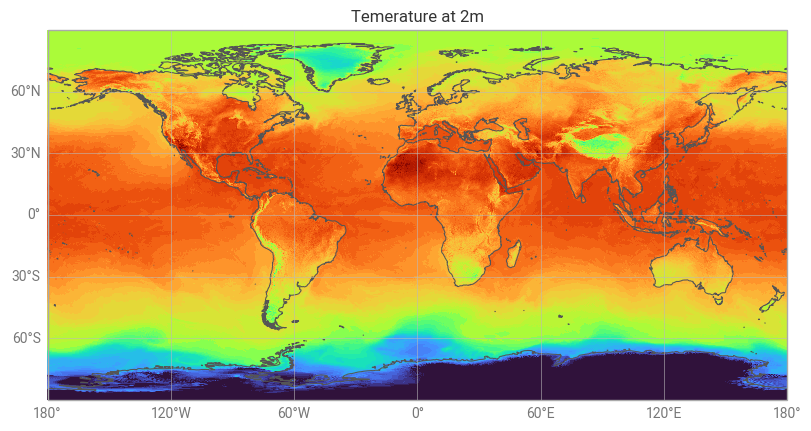

In [7]:
chart = earthkit.plots.Map()
chart.grid_cells(
    data_interpolated[0],
    colors="turbo",
    auto_style=True,
    units="celsius"
)

chart.title("Temerature at 2m")
chart.coastlines()
chart.gridlines()
chart.show()

Now we will plot a specific area using earthkit-plots. In this case we will plot the data we have retrieved over Europe.

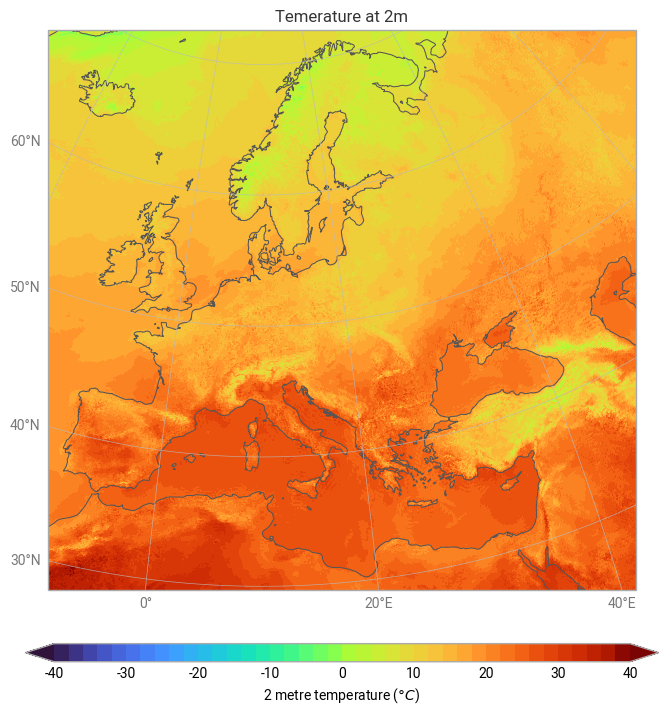

In [8]:
chart = earthkit.plots.Map(domain="Europe")
chart.grid_cells(
    data_interpolated[0],
    colors="turbo",
    auto_style=True,
    units="celsius"
)
chart.legend()
chart.title("Temerature at 2m")
chart.coastlines()
chart.gridlines()
chart.show()